<a href="https://colab.research.google.com/github/Tbharvesh/MachineLearningModels/blob/main/NaiveBayesClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("titanic.csv")


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [6]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df['Sex'].replace(['male','female'],[0,1],inplace=True)

In [9]:
df["Age"].fillna(df.Age.mean(), inplace = True)

In [10]:
df=df.drop(['Name', 'SibSp','Parch','Ticket','Embarked'], axis=1)

In [11]:
df1= df.drop(['PassengerId','Pclass','Sex','Age','Fare','Cabin'],axis=1)
df1

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [12]:
df2=df.drop(['Survived','Cabin'],axis=1)
df2

,PassengerId,Pclass,Sex,Age,Fare
0,1,3,0,22.000000,7.2500
1,2,1,1,38.000000,71.2833
2,3,3,1,26.000000,7.9250
3,4,1,1,35.000000,53.1000
4,5,3,0,35.000000,8.0500
...,...,...,...,...,...
886,887,2,0,27.000000,13.0000
887,888,1,1,19.000000,30.0000
888,889,3,1,29.699118,23.4500
889,890,1,0,26.000000,30.0000


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df2,df1,test_size=0.2)

In [14]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [15]:
from sklearn.metrics import confusion_matrix
# y_test : actual value
# y_predict: value predicted by the model
y_predict=model.predict(X_test)
cm = confusion_matrix(y_test,y_predict,labels=model.classes_)


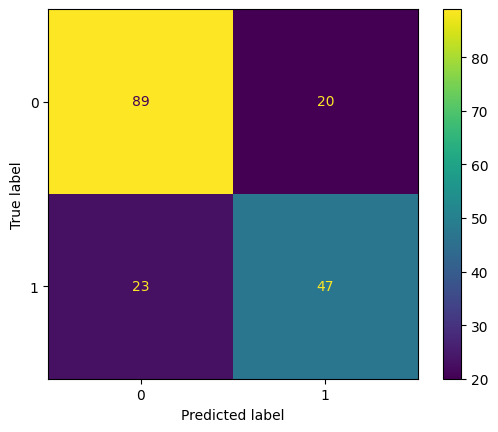

In [16]:
from sklearn.metrics import  ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       109
           1       0.70      0.67      0.69        70

    accuracy                           0.76       179
   macro avg       0.75      0.74      0.75       179
weighted avg       0.76      0.76      0.76       179



In [18]:
#    For any projec-find the relationship betwenn these 4 and chcek which classifier is best for your model.
#       accuracy  f1 score   R  P
# DT
# NK
# KNN

In [19]:
#Flow: load-->preprocess-->split-->classify-->generate report